# ...Made by Cristiano Dos Anjos...
cristianodosanjos019@gmail.com

#### ...

## This is a project about the crypto coin Ethereum.

 We are going to make a great analyze and a create a predicter model using a historical data of investments in a crypto coin called Ethereum.

Ethereum is a decentralized, open-source blockchain featuring smart contract functionality. Ethereum (ETH) is the native cryptocurrency of the platform. It is the second-largest cryptocurrency by market capitalization, after Bitcoin. Ethereum is the most actively used blockchain.

#### We got this data from Kaggle. 
+ In this data we have 34497 records in line.
+ Our main target is the column Close.
+ Date used in this dataset, year of 2016-05 was the initial records and 2020-06 was the final of ours records.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
sns.set_style('whitegrid')

In [2]:
df1 = pd.read_csv('C:/Users/7c4/Documents/Project-A/ETH_1H.csv')
display(df1)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622
...,...,...,...,...,...,...,...,...
34492,1462813200,2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213
34493,1462809600,2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450
34494,1462806000,2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567
34495,1462802400,2016-05-09 14:00:00,ETHUSD,9.55,10.00,9.55,10.00,235.774075


#### Let's see if we have any missing data in this dataset.

In [3]:
df1.isna().sum()

Unix Timestamp    0
Date              0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

#### As we can see, we don't have any missing data.

#### Now, let's sort the our dataset according to date.

In [4]:
df = df1.sort_values(by='Date', ascending=True)

In [5]:
df = df.reset_index(inplace=False)

In [6]:
display(df)

,index,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,34496,1462798800,2016-05-09 13:00:00,ETHUSD,0.00,12.00,0.00,9.55,432.562115
1,34495,1462802400,2016-05-09 14:00:00,ETHUSD,9.55,10.00,9.55,10.00,235.774075
2,34494,1462806000,2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567
3,34493,1462809600,2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450
4,34492,1462813200,2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213
...,...,...,...,...,...,...,...,...,...
34492,4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622
34493,3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
34494,2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
34495,1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299


In [7]:
df = df[['Unix Timestamp', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [8]:
df = df.set_index('Date')

In [9]:
df.head(12)

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2016-05-09 13:00:00,1462798800,ETHUSD,0.00,12.00,0.00,9.55,432.562115
2016-05-09 14:00:00,1462802400,ETHUSD,9.55,10.00,9.55,10.00,235.774075
2016-05-09 15:00:00,1462806000,ETHUSD,10.00,10.00,9.99,9.99,10.973567
2016-05-09 16:00:00,1462809600,ETHUSD,9.99,9.99,9.79,9.83,62.379450
2016-05-09 17:00:00,1462813200,ETHUSD,9.83,9.83,9.48,9.49,329.553213
2016-05-09 18:00:00,1462816800,ETHUSD,9.49,9.49,9.36,9.36,52.954200
2016-05-09 19:00:00,1462820400,ETHUSD,9.36,9.99,9.36,9.99,49.500000
2016-05-09 20:00:00,1462824000,ETHUSD,9.99,9.99,9.97,9.97,10.000000
2016-05-09 21:00:00,1462827600,ETHUSD,9.97,9.97,9.94,9.94,109.177062


In [10]:
df = df.iloc[11:]

In [11]:
df.head(3)

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2016-05-10 00:00:00,1462838400,ETHUSD,9.36,9.36,9.36,9.36,0.000000
2016-05-10 01:00:00,1462842000,ETHUSD,9.36,9.36,9.36,9.36,0.531700
2016-05-10 02:00:00,1462845600,ETHUSD,9.36,9.96,9.36,9.36,33.180327


#### Let's create a column called Close1 that is to see the closing day of torromow compering with the day of today.

In [12]:
df['Close1'] = df['Close'].shift(-1)
df[['Close', 'Close1']].head(4)

,Close,Close1
Date,,
2016-05-10 00:00:00,9.36,9.36
2016-05-10 01:00:00,9.36,9.36
2016-05-10 02:00:00,9.36,9.36
2016-05-10 03:00:00,9.36,9.36


In [13]:
df.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume,Close1
Date,,,,,,,,
2016-05-10 00:00:00,1462838400,ETHUSD,9.36,9.36,9.36,9.36,0.000000,9.36
2016-05-10 01:00:00,1462842000,ETHUSD,9.36,9.36,9.36,9.36,0.531700,9.36
2016-05-10 02:00:00,1462845600,ETHUSD,9.36,9.96,9.36,9.36,33.180327,9.36
2016-05-10 03:00:00,1462849200,ETHUSD,9.36,9.36,9.36,9.36,0.000000,9.36
2016-05-10 04:00:00,1462852800,ETHUSD,9.36,9.36,9.36,9.36,0.000000,9.36


#### Now, we are going to see a graph of the column Close subtracting the column Close1 with a logarithm method.

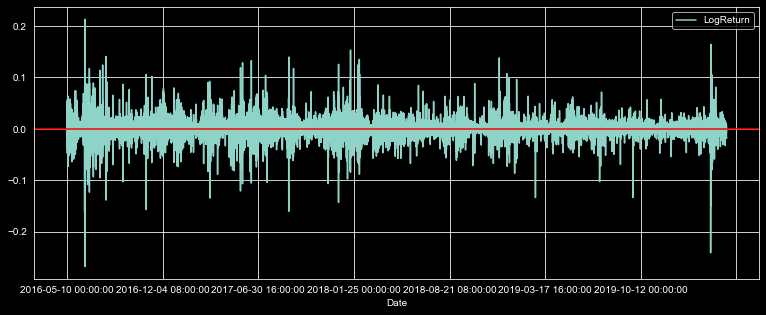

In [14]:
with plt.style.context('dark_background'):
    df['LogReturn'] = np.log(df['Close1']) - np.log(df['Close'])
    plt.figure(figsize=(13,5))
    df['LogReturn'].plot(legend=True)
    plt.axhline(0, color='Red')
    plt.show()

#### With the graph above, we can see that the ethereum had many gains but had falls a lot too..

In [15]:
df.tail()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume,Close1,LogReturn
Date,,,,,,,,,
2020-04-15 20:00:00,1586980800000,ETHUSD,157.10,158.10,156.87,158.04,144.262622,157.18,-0.005457
2020-04-15 21:00:00,1586984400000,ETHUSD,158.04,158.31,157.16,157.18,55.244131,155.81,-0.008754
2020-04-15 22:00:00,1586988000000,ETHUSD,157.18,157.30,155.32,155.81,106.337279,152.94,-0.018592
2020-04-15 23:00:00,1586991600000,ETHUSD,155.81,155.81,151.39,152.94,4277.567299,150.39,-0.016814
2020-04-16 00:00:00,1586995200000,ETHUSD,152.94,152.94,150.39,150.39,650.188125,NaN,NaN


In [16]:
df = df.dropna()

#### Now, let's make two news variables, the first variable will have 10 of mean method using rolling method, and the second variable will have 50 of mean method using rolling method.
+ The first variable is rolling median in a window of 10 length of the column Close.
+ The second variable is rolling median in a window of 50 length of the columns Close.

In [17]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()

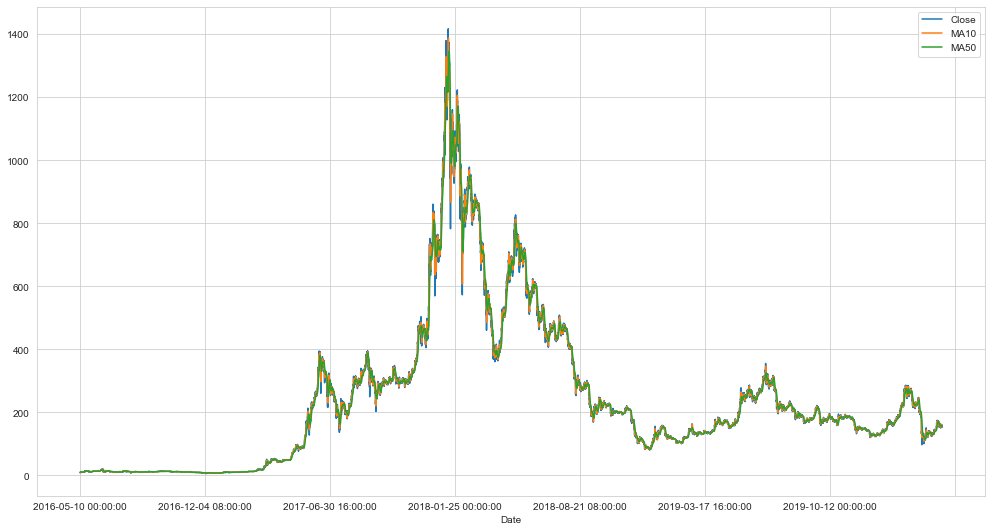

In [18]:
plt.figure(figsize=(17,9))
df['Close'].plot(legend=True)
df['MA10'].plot(legend=True)
df['MA50'].plot(legend=True)
plt.show()

#### As we can see in the graph above, the value of the crypto coin ethereum had many falls.

#### Let's make a standardization in the column LogReturn.

In [19]:
x = df['LogReturn'].mean()
s = df['LogReturn'].std(ddof=1)
n = df['LogReturn'].shape[0]
zhat = (x-0)/(s/(n**0.5))
print(zhat)

1.1165872921403392


#### Now let's make test hypothesis to test the significance of 5% in the zhat of our column LogReturn.

In [20]:
alpha = 0.05
zleft = norm.ppf(alpha/2,0,1)
zright = -zleft
print(zleft, zright)
print('At the significance level of', alpha)
print('Shall we reject:{}'.format(zhat>zright or zhat<zleft))

-1.9599639845400545 1.9599639845400545
At the significance level of 0.05
Shall we reject:False


In [21]:
zright = norm.ppf(1-alpha, 0, 1)
print(zleft, zright)
print('At the significance level of', alpha)
print('Shall we reject:{}'.format(zhat>zright))

-1.9599639845400545 1.6448536269514722
At the significance level of 0.05
Shall we reject:False


In [22]:
p = 1-norm.cdf(zhat, 0, 1)
print(p)
print('At significance level of the', alpha)
print('Shall we reject:', p<alpha)

0.13208541380573968
At significance level of the 0.05
Shall we reject: False


#### With the results above, we can see that we shoudn't reject ours hypothesis.

#### Now let's see how is chance of  our stock drop over 4%  each operation.

In [23]:
mu = df['LogReturn'].mean()
sigma = df['LogReturn'].std(ddof=-1)
print(mu, sigma)
print('The probability of the Ethereum drop over 30% daily is:', norm.cdf(-0.04, mu, sigma))

8.052157835157376e-05 0.013391280891305722
The probability of the Ethereum drop over 30% daily is: 0.0013811075269423876


#### In the line above we can see that according to column LogReturn, our investment have 0.13% chance to drop over 4% per operation.


Now let's calculate 24 hours times 30 days to find out the number of operations into each month that is the median of days in the month.

In [24]:
24*30

720

In [25]:
mu720 = 720*mu
sigma720 = 720**0.5*sigma
print(mu720, sigma720)
print('The probability of the Ethereum drop over 70% during 150 operations is of:', norm.cdf(-0.4, mu720, sigma720))

0.057975536413133105 0.35932577254504283
The probability of the Ethereum drop over 70% during 150 operations is of: 0.1012358232432155


#### With the line above we can see that the Ethereum have 10% chance to have a loss more than 40% in a month.

Now let's see the probability of the Ethereum drop over during 1 year of operations.

In [26]:
24*365

8760

In [27]:
mu8m = 8760*mu
sigma8m = 8760**0.5*sigma
print(mu8m, sigma8m)
print('The probability of the Ethereum drop over 80% of value during one year of operations is of:', norm.cdf(-0.8, mu8m, sigma8m))

0.705369026359786 1.2533552163095203
The probability of the Ethereum drop over 80% of value during one year of operations is of: 0.11486176507608348


In [28]:
print('The probability of the Ethereum drop over 50% of value during one year of operations is of:', norm.cdf(-0.5, mu8m, sigma8m))

The probability of the Ethereum drop over 50% of value during one year of operations is of: 0.16809669046804454


In [29]:
print('The probability of the Ethereum drop over 15% of value during one year of operations is of:', norm.cdf(-0.15, mu8m, sigma8m))

The probability of the Ethereum drop over 15% of value during one year of operations is of: 0.24747299818442686


#### As we can see in the lines above, with 8760 operations that is one year of operations, 24  operations per day. With the first code we can see that the Ethereum have 11% chance to drop over 80% in a year, the second code shows us that Ethereum have 16% chance to have a loss more than 50% in a year, and with the last code with can see that the Ethereum have 24% chance to drop over 15% in a year.

#### Let's see the loss or the gain according to probability using the method VAR or Value at Risk.

In [30]:
print(norm.ppf(0.05, mu720, sigma720))

-0.5330627638147205


In [31]:
print(norm.ppf(0.25, mu720, sigma720))

-0.18438601414978692


In [51]:
print(norm.ppf(0.5, mu720, sigma720))

0.057975536413133105


#### With the lines above using Value at Risk we can see that with 5% chance the monthly return is worse than -53%, Ethereum have also 25% chance to have a monthly loss worse than 18% and  50% chance to have a monthly profit higher than 5%.

...

#### Now we'll see how much money we got with this investment.

In [52]:
d222 = df

In [53]:
df.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume,Close1,LogReturn,MA10,MA50,Shares,Profit,Wealth
Date,,,,,,,,,,,,,,
2016-05-10 00:00:00,1462838400,ETHUSD,9.36,9.36,9.36,9.36,0.000000,9.36,0.0,NaN,NaN,0,0.0,0.0
2016-05-10 01:00:00,1462842000,ETHUSD,9.36,9.36,9.36,9.36,0.531700,9.36,0.0,NaN,NaN,0,0.0,0.0
2016-05-10 02:00:00,1462845600,ETHUSD,9.36,9.96,9.36,9.36,33.180327,9.36,0.0,NaN,NaN,0,0.0,0.0
2016-05-10 03:00:00,1462849200,ETHUSD,9.36,9.36,9.36,9.36,0.000000,9.36,0.0,NaN,NaN,0,0.0,0.0
2016-05-10 04:00:00,1462852800,ETHUSD,9.36,9.36,9.36,9.36,0.000000,9.36,0.0,NaN,NaN,0,0.0,0.0


In [54]:
df['Shares'] = [1 if df.loc[ei, 'MA10']>df.loc[ei, 'MA50'] else 0 for ei in df.index]

In [55]:
df['Profit'] = [df.loc[ei, 'Close1']-df.loc[ei, 'Close'] if df.loc[ei, 'Shares'] else 0 for ei in df.index]

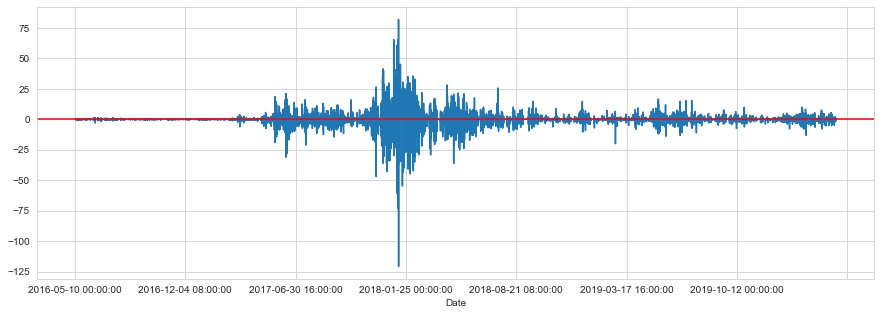

In [56]:
df['Profit'].plot(figsize=(15,5))
plt.axhline(0, color='Red')

In [57]:
df['Wealth'] = df['Profit'].cumsum()

In [58]:
print('The total money win is:', df.loc[df.index[-2], 'Wealth'])
print('The total money spent is:', df.loc[df.index[0], 'Close'])

The total money win is: 1222.9200000000133
The total money spent is: 9.36


#### The value of this crypto coin had many falls, of course the value gained can be more or less according to time that you sell or buy.

## Thanks for analyzing with me.  :)